# CS 6320 Project 2: Detecting Lines and Circles using Hough Transform

A notebook contains many blocks of code, each of which can be run independently. You can run a cell with ctrl+enter or shift+enter (to move to the next cell).


You are expected to complete this notebook with lines of code, plots and texts. You will need to create new cells with original code or text for your analyses and explanations. Explain what you do and analyze your results. This assignment has a total of 100 points.

## Brief
    Due: 2/10/2020 11:59PM
    Hand-in: through Canvas
    Required files: <your_uid>.zip.(Please begin with 'u' for your uid)
<!---<your_uid>_proj1.pdf--> 


## Setup

   0. Unzip proj2_6320.zip and go to proj2_6320 directory.
      - You can run `unzip proj2_6320.zip && cd proj2_6320` in your terminal.
   1. Install [Miniconda](https://docs.conda.io/en/latest/miniconda.html). It doesn’t matter whether you use Python 2 or 3 because we will create our own environment that uses 3 anyways.
   2. Create a conda environment using the appropriate command. On Windows, open the installed “Conda prompt” to run the command. On MacOS and Linux, you can just use a terminal window to run the command, Modify the command based on your OS (linux, mac, or win): `conda env create -f proj2_env_<OS>.yml`.
    - NOTE that proj2_env_<OS>.yml is inside the project folder.
   3. This should create an environment named ‘proj2’. Activate it using the Windows command, activate proj2 or the MacOS / Linux command, source activate proj2
   4. Install the project package, by running `pip install -e .` inside the repo folder.
   5. Run the notebook using `jupyter notebook` under *proj2_6320* directory.
   6. Ensure that all sanity checks are passing by running pytest tests inside the repo folder.
   7. Generate the zip folder for the code portion of your submission once you’ve finished the project using 
    
        `python zip_submission.py --uid <your_uid>` 


## Library Functions
Do not use any library functions to implement Hough Transform.


## Writeup
For this project, this notebook itself is the report. You must run all your cells before you hand in it. You code, results, visualization, and discussion will be used for the grading. You will be deducted points if the results are not shown in this notebook. Do not change the order of the cells. You can add cells in need. You can copy a cell and run it seperately if you need to run a cell multiple times and thus every result is displayed in the cell.


## Rubric
    +26 pts: Ques_1
    +12 pts: Ques_2
    +15 pts: Ques_3
    +17 pts: Ques_4
    +15 pts: Ques_5
    +15 pts: Ques_6

    Distribution of the points in a Question is separately mentioned for each sub-task

    -5*n pts: Lose 5 points for every time you do not follow the instructions for the hand-in format.
    
Submission Format

This is very important as you will lose 5 points for every time you do not follow the instructions. You will attach two items in your submission on Canvas:

1. <your_uid>.zip containing:
    - proj2_code/ - directory containing all your code for this assignment
    - data/       - directory containing all the input images
    - results/    - directory containing all your output images

Do not install any additional packages inside the conda environment. The TAs will use the same environment as defined in the config files we provide you, so anything that’s not in there by default will probably cause your code to break during grading. Do not use absolute paths in your code or your code will break. Use relative paths like the starter code already does. Failure to follow any of these instructions will lead to point deductions. Create the zip file using python zip_submission.py --uid <your_uid> (it will zip up the appropriate directories/files for you!)

In [1]:
import numpy as np
import cv2 as cv
import matplotlib
import matplotlib.pyplot as plt
import math

### 1 Processing an image to detect lines using Hough Transform (26 points)

In this question, we process an image and apply Hough Transform on the processed image

#### Tasks:
1. Compute a smooth version of the Input Image <b>(4 points)</b>
2. Detect edges from Images <b>(6 points)</b>
3. Implement Hough Transform <b>(8 points)</b>
4. Apply Hough Transform to detect lines from images <b>(4 points)</b>
5. Apply Hough Transform to detect edges from images <b>(4 points)</b>

#### 1.1 Compute a smooth version of the Input Image

##### You should use a Gaussian filter to generate a smooth image 

##### Please note:
The function takes in as input only the sigma value (integer only).<br>
The size of the filter should be computed using the sigma value

In [3]:
def Gaussian_Filter(sigma):
    '''
    The function takes in as input only the sigma
    and generates a filter using the sigma value
    The size of the filter should be computed using the sigma value
    '''
    #https://github.com/TheAlgorithms/Python/blob/master/digital_image_processing/filters/gaussian_filter.py
    
    k_size = 3
    center = k_size // 2
    x, y = np.mgrid[0 - center : k_size - center, 0 - center : k_size - center]
    g = 1 / (2 * np.pi * sigma* sigma) * np.exp(-(np.square(x) + np.square(y)) / (2 * np.square(sigma)))

    return g


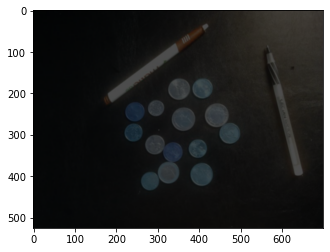

In [4]:
# Reading the Input Image
img        = cv.imread('../data/proj2-clean-image.jpg')

# Generates the Gaussian Filter
g_kernel   = Gaussian_Filter(sigma=2)

# Smoothing the image with the Gaussian Filter
smooth_img = cv.filter2D(img, -1, g_kernel)

# Saves the Smooth Image in the result directory
cv.imwrite("proj2-clean-image-smoothed.png", smooth_img)

# Plots the smoothed image in the notebook
plt.figure(); plt.imshow(smooth_img.astype(np.uint8));

最有可能角度為 :  87 最有可能半徑為 : 13


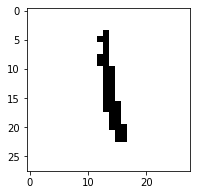

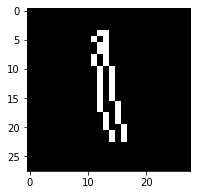

In [45]:

img        = cv.imread('D:\Python\Computer Vision\proj1_6320\mnist_1.bmp',0)
#img.shape

threshold = 0
threshold = threshold
image_binary = np.zeros([28,28])
for y in range(img.shape[1]) : 
    for x in range(img.shape[0]) :
        if(img[y][x]> threshold) : image_binary[y][x] = 1
        if(img[y][x]<=threshold) : image_binary[y][x] = 0  
plt.figure(figsize=(3,3)); plt.imshow(image_binary,cmap='gray');


# edge
image_edge = np.zeros([28,28])
for y in range(image_binary.shape[1]) : 
    for x in range(image_binary.shape[0]-1) :
        image_edge[y][x] = abs(image_binary[y][x+1] - image_binary[y][x])   
plt.figure(figsize=(3,3)); plt.imshow(image_edge[:,:],cmap='gray');


theta_max = 90
rho_max = round(np.sqrt(28**2+28**2))
acc_matrix = np.zeros([theta_max,rho_max])
acc_max_value = 0
detect_line_theta  = 0
detect_line_rho  = 0
for y in range(image_binary.shape[1]) : 
    for x in range(image_binary.shape[0]) : 
        if(image_edge[y][x] ==1) :
            for theta in range(theta_max):
                rho = round( x*np.cos(3.14159*(theta)/180)  +  y*np.sin(3.14159*(theta)/180))
                acc_matrix[theta][rho]=acc_matrix[theta][rho]+1 #print(theta,rho,acc_matrix[theta][rho])
                if(acc_matrix[theta][rho]>acc_max_value) :
                    acc_max_value = acc_matrix[theta][rho]
                    detect_line_theta = 90-theta
                    detect_line_rho = rho
                    
print("最有可能角度為 : ",detect_line_theta, '最有可能半徑為 :', detect_line_rho)

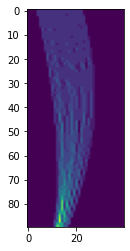

In [34]:
plt.imshow(acc_matrix)

In [35]:
rho_max

40

In [21]:
img

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 251,
        208, 251, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 192,  36,
          0, 100, 251, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 160,   0,
          0,  64, 208, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [25

In [6]:
def rgb2gray(rgb):
    '''
    Converts the RGB image to the Gray Scale
    '''
    return np.dot(rgb[..., :3], [0.299, 0.587, 0.114])

In [8]:
def image_uint(input_arr):
    '''
    Scales the image intensity values to the range [0, 255]
    '''
    return (255.0*(input_arr - np.min(input_arr))/(np.max(input_arr) - np.min(input_arr))).astype(np.uint8)

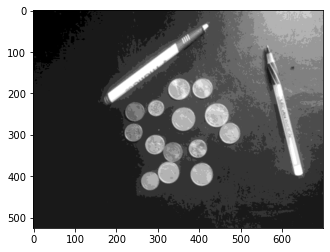

In [13]:
#補
img_gray = rgb2gray(img)
img_gray_unit = image_uint(img_gray)
smooth_img = cv.filter2D(img_gray_unit, -1, Gaussian_Filter(sigma=6))
plt.figure(); plt.imshow(smooth_img.astype(np.uint8), cmap='gray');

#### 1.2 Edge Detector
Now we need to extract the edges from the input images. This is as essential step towards detection of lines and circles from the image.

#### You should define a Sobel filter to detect edges in the Original and Smooth Image
Following the definition of the filter, you convolve the filter over the input image using OpenCV library function, <b>filter2D()</b>. You are not required to write any convolution function to apply the filter.

You are required to detect edges on both the <b>original</b> and <b>smooth</b> images.

<b>Do you observe any difference between them? Please comment in a separate cell.</b>

#### 1.2.1 Edge Detector on the Original Image
Please remember the edge detection method should be applied on <b>gray images</b>.
The edge image should be saved as <b>img_gray_edge</b>.

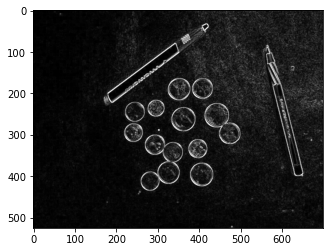

In [6]:
##############################
# TO DO: Your Implementation
##############################

img_gray = rgb2gray(img)
img_gray_unit = image_uint(img_gray)

#sobel
sobel_kernal_x = np.array([[1,2,1],[0,0,0],[-1,-2,-1]],dtype=int)
sobel_kernal_y = np.array([[1,0,-1],[2,0,-2],[1,0,-1]],dtype=int)
sobel_horizon = cv.filter2D(img_gray_unit, cv.CV_16S, sobel_kernal_x)
sobel_vertical = cv.filter2D(img_gray_unit, cv.CV_16S, sobel_kernal_y)
sobel_horizon_abs = cv.convertScaleAbs(sobel_horizon)
sobel_vertical_abs = cv.convertScaleAbs(sobel_vertical)
img_gray_edge = cv.addWeighted(sobel_horizon_abs, 0.5, sobel_vertical_abs, 0.5, 0)

################################
# Your Implementation ENDS here
################################

# Save the Image
cv.imwrite('results/Ques_1/Ori_Clean_Edge_Image.png', img_gray_edge)

#Plot the Image
plt.figure(); plt.imshow(img_gray_edge.astype(np.uint8), cmap='gray');

#### 1.2.2 Edge Detector on the Smooth Image
Please remember the edge detection method should be applied on <b>gray images</b>.
The edge image should be saved as <b>smooth_img_gray_edge</b>.

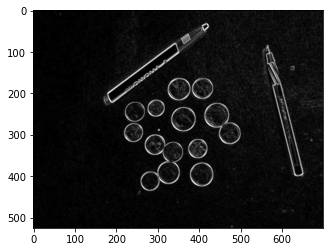

In [7]:
##############################
# TO DO: Your Implementation
##############################

smooth_img_gray = rgb2gray(smooth_img)
smooth_img_gray_unit = image_uint(smooth_img_gray)

#sobel
sobel_kernal_x = np.array([[1,2,1],[0,0,0],[-1,-2,-1]],dtype=int)
sobel_kernal_y = np.array([[1,0,-1],[2,0,-2],[1,0,-1]],dtype=int)
sobel_horizon = cv.filter2D(smooth_img_gray_unit, cv.CV_16S, sobel_kernal_x)
sobel_vertical = cv.filter2D(smooth_img_gray_unit, cv.CV_16S, sobel_kernal_y)
sobel_horizon_abs = cv.convertScaleAbs(sobel_horizon)
sobel_vertical_abs = cv.convertScaleAbs(sobel_vertical)
smooth_img_gray_edge = cv.addWeighted(sobel_horizon_abs, 0.5, sobel_vertical_abs, 0.5, 0)

################################
# Your Implementation ENDS here
################################

# Save the Image
cv.imwrite('Smooth_Clean_Edge_Image.png', smooth_img_gray_edge)

#Plot the Image
plt.figure(); plt.imshow(smooth_img_gray_edge.astype(np.uint8), cmap='gray');

#### 1.3 Hough Transform to detect Lines
In this exercise you are expected to implement Hough Transform for line detection as discussed in class. Hough Transform uses an accumulator array to capture the lines present in image. It is applied on binary images which can be generated by thresholding the edge detector output.<br>

For this exercise, the range of theta is <b>[-90, 90]</b> and the range of rho is <b>[-img_diag, img_diag]</b>.

In [8]:
def hough_transform(input_img, threshold, theta_res, rho_res):
    # Rho and Theta ranges
    thetas = np.deg2rad(np.arange(0, 90.0,theta_res))
    width, height = input_img.shape
    diag_len = np.ceil(np.sqrt(width * width + height * height))   # max_dist
    rhos = np.linspace(-diag_len, diag_len, int(diag_len * rho_res))
    
    # Cache some resuable values
    cos_t = np.cos(thetas)
    sin_t = np.sin(thetas)
    num_thetas = len(thetas)

    # Accumulator array 
    accumulator=np.zeros((int(2*diag_len),num_thetas),dtype=np.uint64)
    
    #binary
    ret,binary_img = cv.threshold(input_img,threshold,255,cv.THRESH_BINARY)
    are_edges = binary_img > 0 
    y_idxs, x_idxs = np.nonzero(are_edges)
    
    #hough
    for i in range(len(x_idxs)):
        x = x_idxs[i]
        y = y_idxs[i]
        
        for t_idx in range(num_thetas):
            # Calculate rho. diag_len is added for a positive index
            rho = round(x * cos_t[t_idx] + y * sin_t[t_idx]) + round(diag_len)
            accumulator[rho, t_idx] += 1
    
    return accumulator,thetas, rhos,binary_img



In [9]:
def hough_transform(input_img, threshold, theta_res, rho_res):

    '''
    This function computes the Accumulator array
    
    Input:
    1. Output of the Edge Detection Method
    2. Threshold value for generating the binary image
    3. Resolution for Angle
    4. Resolution for Perpendicular Distance from the Origin (Rho)
    
    Output:
    1. Accumulator array       , declare as accumulator
    2. Array of Theta          , declare as thetas
    3. Array of Rho            , declare as rhos
    4. Thresholded Binary Image, declare as binary_img

    '''

    ##############################
    # TO DO: Your Implementation
    ##############################
    
    #egde
    ret,binary_img = cv.threshold(input_img,threshold,255,cv.THRESH_BINARY)
    
    # Theta 0 - 180 degree
    # Calculate 'cos' and 'sin' value ahead to improve running time
    thetas = np.arange(-90, 90, theta_res)
    cos = np.cos(np.deg2rad(thetas))
    sin = np.sin(np.deg2rad(thetas))
    
    # Generate a accumulator matrix to store the values
    rho_range = round(math.sqrt(binary_img.shape[0]**2 + binary_img.shape[1]**2))
    rhos = np.linspace(-rho_range, rho_range, int(rho_range * rho_res),rho_res)
    accumulator = np.zeros((len(rhos), len(thetas)), dtype=np.uint8)

    # Threshold to get edges pixel location (x,y)
    edge_pixels = np.where(binary_img == 255)
    coordinates = list(zip(edge_pixels[0], edge_pixels[1]))

    # Calculate rho value for each edge location (x,y) with all the theta range
    for p in range(len(coordinates)):
        for t in range(len(thetas)):
            rho = int(round(coordinates[p][1] * cos[t] + coordinates[p][0] * sin[t]))
            accumulator[rho, t] += 2 # Suppose add 1 only, Just want to get clear resul
    
                
    ################################
    # Your Implementation ENDS here
    ################################

    return accumulator,thetas, rhos,binary_img



#### 1.3.1 Hough Transform to detect Lines from Original Image

Use the edges detected from the <b>original input image</b> to apply Hough Transform function.<br>
<br>

You need to find a resaonable estimate of the threshold for generating the binary image which is good enough for the Hough transform to extract lines. Please discuss the effect of the threshold on the performance of the algorithm.

Plot the Accumulator Array using the matplotlib function, figure size (20, 20), with proper labeling and title. The image should be saved as <b>Ori_Clean_Image_Accumulator_Array.png</b> in results/Ques_1 sub-directory.


True

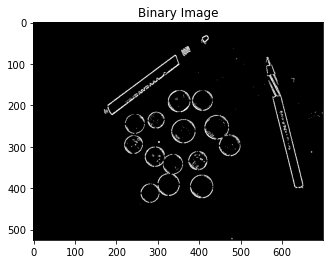

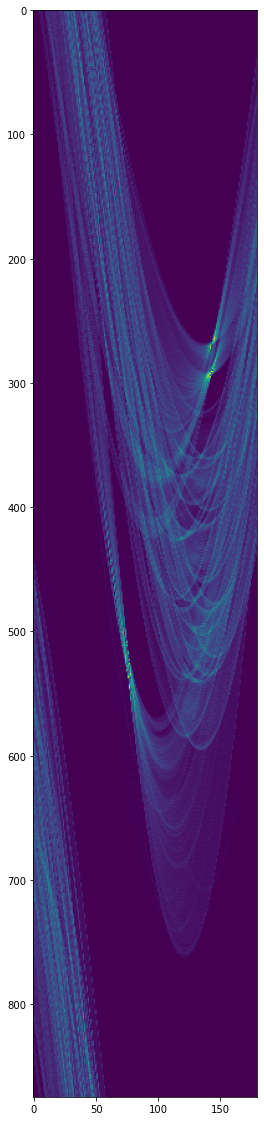

In [10]:
# Invoke the Hough Transform Method to Extract the Lines from the Image
# You need to find a resaonable estimate of the threshold for generating a binary image
# which is good enough for the Hough transform to extract the lines
# To expedite the process you can play with the resolution of the theta and rho 
# without compromising the quality of the results

ori_accumulator,ori_thetas, ori_rhos, ori_binary_img = hough_transform(img_gray_edge,threshold=140,theta_res=1,rho_res=1)

# Save the Thresholded Binary Image
cv.imwrite('.Ori_Clean_Binary_Image.png', ori_binary_img)

#Plot the Binary Image
plt.figure(); plt.imshow(ori_binary_img.astype(np.uint8), cmap='gray'); plt.title('Binary Image')

# Plot Accumulator Array
plt.figure(figsize=(20,20)); plt.imshow(ori_accumulator)
cv.imwrite('Ori_Clean_Image_Accumulator_Array.png', ori_accumulator)

################################
# Your Implementation ENDS here
################################

For plotting lines (infinite) in the images, you should use the OpenCV <b>line</b> function which can hold all the lines and then you could overlay them on the input image.

In [11]:
def plot_lines(img_path, accumulator, thetas, rhos, acc_threshold, save_path):

    '''
    This function plots infinite lines
    This should be used to draw lines along the boundary of the pens
    
    Input:
    1. RGB Image for plotting lines
    2. Accumulator array
    3. Vector of the angle values
    4. Vector of the rho values
    5. Threshold value for selecting lines from the accumulator
    6. Path to save the image with lines drawn on them
    
    Output:
    Returns Nothing
    Saves the output image in save_path
    '''
    #ref
    #https://github.com/Hank-Tsou/Hough-Transform-Line-Detection/blob/master/hough_line_transform.py
    
    #load image of color
    import matplotlib.pyplot as plt
    img_result = cv.imread(img_path)
    
    #find out line point
    feature_point  = np.where(accumulator > acc_threshold)
    coordinates = list(zip(feature_point[0], feature_point[1]+(np.min(thetas)))) #zip func will be p(a,b)
    
    # Use line equation to draw detected line on an original image
    for i in range(0, len(coordinates)):
        a = np.cos(np.deg2rad(coordinates[i][1]))
        b = np.sin(np.deg2rad(coordinates[i][1]))
        x0 = a*coordinates[i][0]
        y0 = b*coordinates[i][0]
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv.line(img_result,(x1,y1),(x2,y2),(0,255,0),1)
    

    # show result
    plt.imshow(img_result)
    cv.imwrite(save_path, ori_binary_img)
    
    ################################
    # Your Implementation ENDS here
    ################################


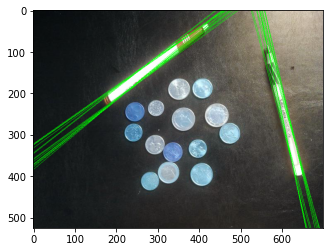

In [12]:
# Plot the Lines extracted on the Original Image
# Play with the Accumulator Thresholding to get rid of the unwanted lines

plot_lines('../data/proj2-clean-image.jpg', ori_accumulator, ori_thetas, ori_rhos, acc_threshold=200, save_path='Ori_Clean_Image_Output_Lines.png')

#### 1.3.2 Hough Transform to detect Lines from the Smooth Image

Use the edges detected from the <b>smooth input image</b> to apply Hough Transform function.<br>
<br>

You need to find a resaonable estimate of the threshold for generating the binary image which is good enough for the Hough transform to extract lines. Please discuss the effect of the threshold on the performance of the algorithm.

Plot the Accumulator Array using the matplotlib function, figure size (20, 20), with proper labeling and title. The image should be saved as <b>Smooth_Clean_Image_Accumulator_Array.png</b> in results directory.

True

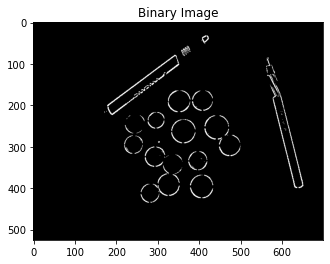

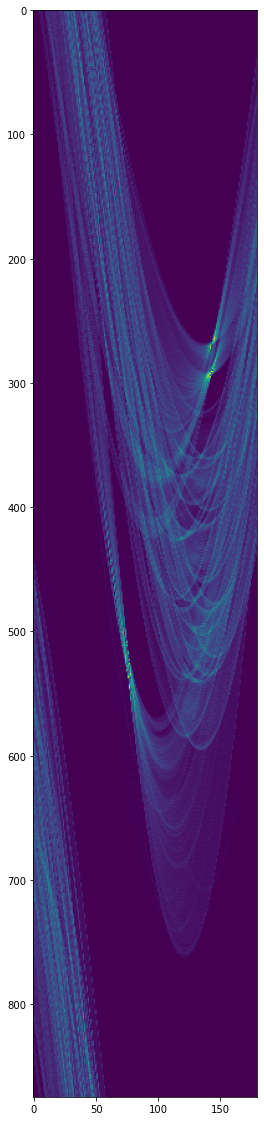

In [13]:
# Invoke the Hough Transform Method to Extract the Lines from the Image
# You need to find a resaonable estimate of the threshold for generating a binary image
# which is good enough for the Hough transform to extract the lines
# To expedite the process you can play with the resolution of the theta and rho 
# without compromising the quality of the results

smooth_accumulator, smooth_thetas, smooth_rhos, smooth_binary_img = hough_transform(smooth_img_gray_edge, threshold=140, theta_res=1, rho_res=1)

# Save the Thresholded Binary Image
cv.imwrite('Smooth_Clean_Binary_Image.png', smooth_binary_img)

#Plot the Binary Image
plt.figure(); plt.imshow(smooth_binary_img.astype(np.uint8), cmap='gray'); plt.title('Binary Image') 

##############################
# TO DO: Your Implementation
##############################
plt.figure(figsize=(20,20)); plt.imshow(ori_accumulator)
cv.imwrite('Smooth_Clean_Image_Accumulator_Array.png', smooth_accumulator)

################################
# Your Implementation ENDS here
################################

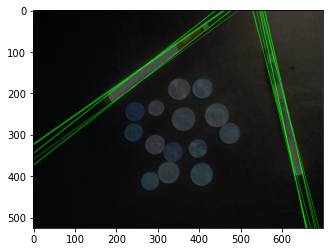

In [14]:
# Plot the Lines extracted on the Smooth Image
# Play with the Accumulator Thresholding to get rid of the unwanted lines

plot_lines('proj2-clean-image-smoothed.png', smooth_accumulator, smooth_thetas, smooth_rhos, acc_threshold=200, save_path='Smooth_Clean_Image_Output_Lines.png')

#### 1.4 Hough Transform to detect Edges

Plot the Edges instead of Lines (infinite) along the boundary of the pens.

you should use the OpenCV <b>line</b> function which can hold all the edges and you could then overlay them on the input image.

In [15]:
def plot_edges(img_path, accumulator, thetas, rhos, acc_threshold, binary_image, save_path):

    '''
    This function plots edges
    This should be used to draw edges along the boundary of the pens
    
    Input:
    1. RGB Image for plotting lines
    2. Accumulator array
    3. Vector of the angle values
    4. Vector of the rho values
    5. Threshold value for selecting lines from the accumulator
    6. Path to save the image with lines drawn on them
    
    '''
    #ref
    #https://github.com/Hank-Tsou/Hough-Transform-Line-Detection/blob/master/hough_line_transform.py
    
    #load image of color
    import matplotlib.pyplot as plt
    img_result = cv.imread(img_path)
    
    #find out line point
    feature_point  = np.where(accumulator > acc_threshold)
    coordinates = list(zip(feature_point[0], feature_point[1]+(np.min(thetas)))) #zip func will be p(a,b)
    
    # Use line equation to draw detected line on an original image
    for i in range(0, len(coordinates)):
        a = np.cos(np.deg2rad(coordinates[i][1]))
        b = np.sin(np.deg2rad(coordinates[i][1]))
        x0 = a*coordinates[i][0]
        y0 = b*coordinates[i][0]
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv.line(img_result,(x1,y1),(x2,y2),(0,255,0),1)
        
    
    #find Edge:
    img_edge_result = cv.imread(img_path)
    for j in range(binary_image.shape[0]):
        for i in range(binary_image.shape[1]):
            if  binary_image[j][i] == 255 :
                img_edge_result[j][i][0] = img_result[j][i][0]
                img_edge_result[j][i][1] = img_result[j][i][1]
                img_edge_result[j][i][2] = img_result[j][i][2]
                
    # show result
    plt.imshow(img_edge_result)
    cv.imwrite(save_path, ori_binary_img)
    

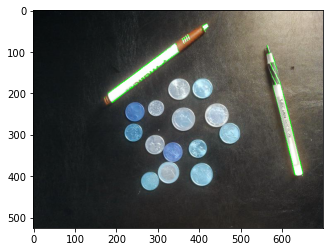

In [16]:
# Plot the Boundaries of the Pen on the Real Image
# This unlike the previous result is restricted to a finite length line
# Play with the Accumulator Thresholding to get rid of the unwanted lines
acc_threshold=200
plot_edges('../data/proj2-clean-image.jpg', ori_accumulator, ori_thetas, ori_rhos, acc_threshold, ori_binary_img, save_path='Ori_Clean_Image_Output_Edges.png')

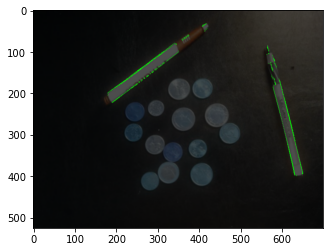

In [17]:
# Plot the Boundaries of the Pen on the Smooth Image
# This unlike the previous result is restricted to a finite length line
# Play with the Accumulator Thresholding to get rid of the unwanted lines
acc_threshold=200
plot_edges('proj2-clean-image-smoothed.png', smooth_accumulator, smooth_thetas, smooth_rhos, acc_threshold, smooth_binary_img, save_path='../results/Ques_1/Smooth_Clean_Image_Output_Edges.png')

### 2. Hough Transform to detect Circles (12 points)
In this exercise you are expected to implement Hough Transform for circle detection in images as discussed in class. Hough Transform uses an accumulator array to capture the circles present in image. As a circle could be defined with three parametrs, center (along X and Y axis) and radius, we need a three-dimensional accumulator to store the circle information.

#### Tasks:
1. Hough Transform to detect circles from the Images <b>(8 points)</b>
2. Plot the detected circles on the corresponding images <b>(4 points)</b>

You need to perform the task on the <b>Original Image</b> and <b>Smooth Image</b> computed earlier.

It is applied on <b>binary images</b> which can be generated by thresholding the edge detector output.<br>
You should use the result of the previous edge detection task as input for this exercise.

<b>The center of the circle should be computed using the parametric equations.</b>

In [18]:
def circle_hough_transform(input_img, threshold, min_radius, max_radius, radius_res, angle_res):

    '''
    This function computes the accumulator array with the circles
    detected in the image
    
    Input:
    1. Output of the Edge Detection Method
    2. Threshold value for generating the binary image
    3. Min Radius of the Circle to be detected
    4. Max Radius of the Circle to be detected
    5. Resolution for Circle Radius
    6. Angle resolution for parametric equation of circle
    
    Output:
    1. Accumulator array          , declare as accumulator
    2. Array for Circle Center    , declare as center_x_vector, center_y_vector
    3. Array for Radius of Circle , declare as radius_vector
    4. Thresholded Binary Image   , declare as binary_img

    '''
    #ref
    #https://github.com/adityaintwala/Hough-Circle-Detection
        
    ############################
    # To DO: Your Implementation
    ############################
    #egde
    ret,binary_img = cv.threshold(input_img,threshold,255,cv.THRESH_BINARY)
    
    # Theta 0 - 360 degree
    thetas = np.arange(0, 360, angle_res)
    
    # Radius ranges from r_min to r_max 
    rs = np.arange(min_radius, max_radius, radius_res)
    
    # Calculate Cos(theta) and Sin(theta) it will be required later
    cos = np.cos(np.deg2rad(thetas))
    sin = np.sin(np.deg2rad(thetas))
    
    
    # Evaluate and keep ready the candidate circles dx and dy for different delta radius
    # based on the the parametric equation of circle.
    circle_candidates = []
    for r in rs:
        for t in range(len(thetas)):
            circle_candidates.append((r, int(r * cos[t]), int(r * sin[t])))
            
            
    # Hough Accumulator, we are using defaultdic instead of standard dict as this will initialize for key which is not 
    # aready present in the dictionary instead of throwing exception.
    from collections import defaultdict
    accumulator = defaultdict(int)# default值以一個list()方法產生,解決不存在的值
    idx = 0
    center_x_vector=np.zeros(binary_img.shape[0]*binary_img.shape[1]*len(circle_candidates))
    center_y_vector=np.zeros(binary_img.shape[0]*binary_img.shape[1]*len(circle_candidates))
    for y in range(binary_img.shape[0]):
        for x in range(binary_img.shape[1]):
            if binary_img[y][x] != 0: #white pixel
                # Found an edge pixel so now find and vote for circle from the candidate circles passing through this pixel.
                for r, rcos_t, rsin_t in circle_candidates:
                    #https://zh.wikipedia.org/wiki/%E5%8F%83%E6%95%B8%E6%96%B9%E7%A8%8B
                    x_center = x - rcos_t
                    y_center = y - rsin_t
                    center_x_vector[idx]=x_center
                    center_y_vector[idx]=y_center
                    idx+=1
                    accumulator[(x_center, y_center, r)] += 1 #vote for current candidate
            
            
    radius_vector = rs
    ################################
    # Your Implementation ENDS here
    ################################
    

    return accumulator, radius_vector, center_x_vector, center_y_vector, binary_img


(20, 20, 0)


#### 2.1.1 Hough Transform to detect Circles from the Original Image

Use the edges detected from the <b>original input image</b> to apply Hough Transform function.<br>

You need to find a resaonable estimate of the threshold for generating the binary image which is good enough for the Hough transform to extract circles. Please discuss the effect of the threshold on the performance of the algorithm.

##### Please note that you should be able to extract atleast 7 coins. This ensures 75% of the credit.

True

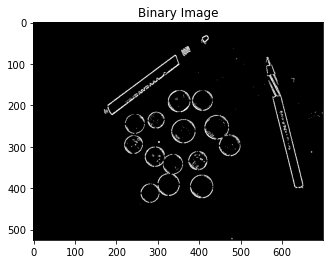

In [19]:
# Invoke the Hough Transform Method to Extract the Circles from the Image
# To expedite the process you can play with the resolution parameters 
# without compromising the quality of the results
threshold=140
min_radius = 20
max_radius = 35
radius_res = 1
angle_res = 10
ori_circle_accumulator, ori_circle_radius_vector, ori_circle_center_x_vector, ori_circle_center_y_vector, ori_circle_img_bin = circle_hough_transform(img_gray_edge, threshold, min_radius, max_radius, radius_res, angle_res)

# Save the Thresholded Binary Image
plt.figure(); plt.imshow(ori_circle_img_bin.astype(np.uint8), cmap='gray'); plt.title('Binary Image') 
cv.imwrite('Ori_Clean_Binary_Image_Circle_Detection.png', ori_circle_img_bin)

#### 2.1.2 Hough Transform to detect Circles from the Smooth Image

Use the edges detected from the <b>smooth input image</b> to apply Hough Transform function or generate a suitable smooth image (following the same procedure) for this exercise to detect coins. If you generate a new smooth image please save the generated image as <b>proj2-clean-image-smoothed-circle-detection.png</b>.<br>

You should explain the reason for generating a new smooth image, report the value of sigma and discuss its effect on the performance of the circle detection algorithm.<br>
<br>
You need to find a resaonable estimate of the threshold for generating the binary image
which is good enough for the Hough transform to extract circles. Please discuss the effect of the threshold on the performance of the algorithm.<br>

##### Please note that you should be able to extract atleast 7 coins. This ensures 75% of the credit.

True

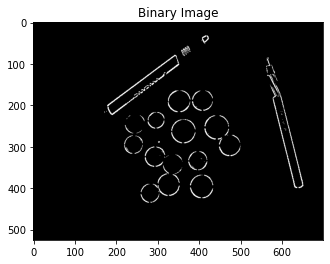

In [20]:
# Invoke the Hough Transform Method to Extract the Circles from the Image
# You need to find a resaonable estimate of the threshold for generating a binary image
# which is good enough for the Hough transform to extract circles
# To expedite the process you can play with the resolution parameters 
# without compromising the quality of the results
threshold=140
min_radius = 20
max_radius = 35
radius_res = 1
angle_res = 10
smooth_circle_accumulator, smooth_circle_radius_vector, smooth_circle_center_x_vector, smooth_circle_center_y_vector, smooth_circle_img_bin = circle_hough_transform(smooth_img_gray_edge, threshold, min_radius, max_radius, radius_res, angle_res)

# Save the Thresholded Binary Image
plt.figure(); plt.imshow(smooth_circle_img_bin.astype(np.uint8), cmap='gray'); plt.title('Binary Image') 
cv.imwrite('Smooth_Clean_Binary_Image_Circle_Detection.png', smooth_circle_img_bin)

#### 2.2 Plot the Circles around the coins in the image
You should use the OpenCV <b>circle</b> function for drawing circles. This can hold all the circles and then you could overlay them on the input image.

In [21]:
def plot_circles(img_path, accumulator, radius_vector, center_x_vector, center_y_vector, acc_threshold, bin_image, img_save_path):

    '''
    This function plots cirles
    This should be used to draw lines along the boundary of the pens
    
    Input:
    1. RGB Image for plotting circles
    2. Accumulator array
    3. Vector of the radius values
    4. Vector of the center of the circle
    5. Threshold value for selecting lines from the accumulator
    6. Path to save the image with lines drawn on them
    
    Output:
    Returns Nothing
    Saves the output image in save_path
    '''
    
    ##############################
    # TO DO: Your Implementation
    ##############################
    #load image
    img_result = cv.imread(img_path)
    out_circles = []
    num_thetas = 360/10
    bin_threshold =0.4
    
    # Sort the accumulator based on the votes for the candidate circles 
    for candidate_circle, votes in sorted(accumulator.items(), key=lambda i: -i[1]):
        x, y, r = candidate_circle
        current_vote_percentage = votes / num_thetas
        if current_vote_percentage >= bin_threshold: 
            # Shortlist the circle for final result
            out_circles.append((x, y, r, current_vote_percentage))
            #print(x, y, r, current_vote_percentage)
            
    # Post process the results, can add more post processing later.
    post_process = True
    if post_process :
        acc_threshold
        postprocess_circles = []
        for x, y, r, v in out_circles:
            # Exclude circles that are too close of each other
            # all((x - xc) ** 2 + (y - yc) ** 2 > rc ** 2 for xc, yc, rc, v in postprocess_circles)
            # Remove nearby duplicate circles based on pixel_threshold
            if all(abs(x - xc) > acc_threshold or abs(y - yc) > acc_threshold or abs(r - rc) > acc_threshold for xc, yc, rc, v in postprocess_circles):
                postprocess_circles.append((x, y, r, v))
                out_circles = postprocess_circles
                
    # Draw shortlisted circles on the output image
    for x, y, r, v in out_circles:
        img_result = cv.circle(img_result, (x,y), r, (0,255,0), 2)
        
        
    #Draw Edge:
    img_edge_result = cv.imread(img_path)
    for j in range(bin_image.shape[0]):
        for i in range(bin_image.shape[1]):
            if  bin_image[j][i] == 255 :
                img_edge_result[j][i][0] = img_result[j][i][0]
                img_edge_result[j][i][1] = img_result[j][i][1]
                img_edge_result[j][i][2] = img_result[j][i][2]
        
    plt.imshow(img_edge_result)

    ################################
    # Your Implementation ENDS here
    ################################
        
    # All the changes made in the input image are finally
    # written on a new file
    #cv.imwrite(img_save_path, cv_img)
    

#### 2.2.1 Plot the Circles around the coins in the Original Image

Play with the Accumulator Thresholding to get rid of unwanted circles.


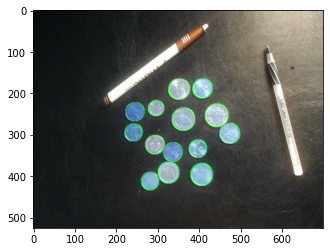

In [22]:
# Plot the Circles extracted on the Original Image
acc_threshold =5
plot_circles('../data/proj2-clean-image.jpg', ori_circle_accumulator, ori_circle_radius_vector, ori_circle_center_x_vector, ori_circle_center_y_vector, acc_threshold, ori_circle_img_bin, '../results/Ques_2/Ori_Clean_Image_Output_Circles.png')

#### 2.2.2 Plot the Circles around the coins in the Smooth Image

Play with the Accumulator Thresholding to get rid of unwanted circles.


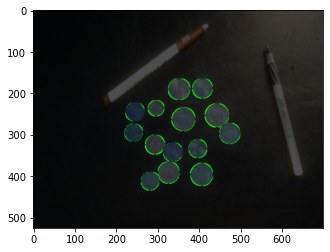

In [23]:
# Plot the Circles extracted on the Smooth Image
acc_threshold =5
plot_circles('proj2-clean-image-smoothed.png', smooth_circle_accumulator, smooth_circle_radius_vector, smooth_circle_center_x_vector, smooth_circle_center_y_vector, acc_threshold, smooth_circle_img_bin, '../results/Ques_2/Smooth_Clean_Image_Output_Circles.png')

### 3 Hough Transform to detect Lines from Cluttered Image (15 points)
In this exercise you are expected to implement Hough Transform for line detection from cluttered image. Hough Transform uses an accumulator array to capture the lines present in image. It is applied on binary images which can be generated by thresholding the edge detector output.

#### Tasks:
1. Smooth the given image using the Gaussian Filter. Determine the Gaussian filter and comment on its effect in determining the lines. Save the smooth image as <b>clutter_smooth_img</b>, numpy array. <b>(2 points)</b>
2. Identify the edges in the smooth image, generated in the previous step. You can use the solution of <b>Ques 1.2</b>. Save the numpy array as <b>clutter_smooth_img_gray_edge</b>. <b>(2 points)</b>
3. Identify the lines in the Image using Hough Transform. <b>(2 points)</b>
4. Draw the detected lines. <b>(2 points)</b>
5. Likely the last produced several lines which DO NOT repesent the boundary of the pens. How do you take care of the probem? <b>(2 points)</b>
6. Find the lines which represents only the boundary of the pens. <b>(5 points)</b>

#### 3.1 Smooth the given image using the Gaussian Filter. Determine the Gaussian filter and comment on its effect in determining the lines. Save the smooth image as clutter_smooth_img, numpy array.

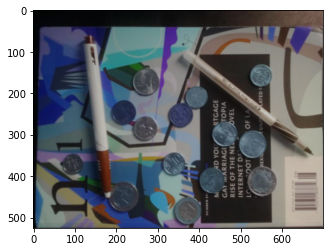

In [24]:
# Reading the Input Image
clutter_img        = cv.imread('../data/proj2-clutter-image.jpg')

##############################
# TO DO: Your Implementation
##############################
# Generates the Gaussian Filter
g_kernel   = Gaussian_Filter(sigma=1)

# Smoothing the image with the Gaussian Filter
clutter_smooth_img = cv.filter2D(clutter_img, -1, g_kernel)

################################
# Your Implementation ENDS here
################################

# Saves the Smooth Image in the result directory
cv.imwrite("proj2-clutter-image-smoothed.png", clutter_smooth_img)

# Plots the smoothed image in the notebook
plt.figure(); plt.imshow(clutter_smooth_img.astype(np.uint8));

#### 3.2 Identify the edges in the smooth image, generated in the previous step. You can use the solution of Ques 1.2. Save the numpy array as clutter_smooth_img_gray_edge.

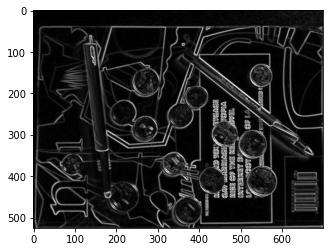

In [25]:
##############################
# TO DO: Your Implementation
##############################

clutter_smooth_img_gray = rgb2gray(clutter_smooth_img)
clutter_smooth_img_gray_unit = image_uint(clutter_smooth_img_gray)

#sobel
sobel_kernal_x = np.array([[1,2,1],[0,0,0],[-1,-2,-1]],dtype=int)
sobel_kernal_y = np.array([[1,0,-1],[2,0,-2],[1,0,-1]],dtype=int)
sobel_horizon = cv.filter2D(clutter_smooth_img_gray_unit, cv.CV_16S, sobel_kernal_x)
sobel_vertical = cv.filter2D(clutter_smooth_img_gray_unit, cv.CV_16S, sobel_kernal_y)
sobel_horizon_abs = cv.convertScaleAbs(sobel_horizon)
sobel_vertical_abs = cv.convertScaleAbs(sobel_vertical)
clutter_smooth_img_gray_edge = cv.addWeighted(sobel_horizon_abs, 0.5, sobel_vertical_abs, 0.5, 0)

################################
# Your Implementation ENDS here
################################

# Save the Image
cv.imwrite('Smooth_Clutter_Edge_Image.png', clutter_smooth_img_gray_edge)

#Plot the Image
plt.figure(); plt.imshow(clutter_smooth_img_gray_edge.astype(np.uint8), cmap='gray');

#### 3.3 Identify the lines in the Image using Hough Transform

Text(0.5, 1.0, 'Binary Image')

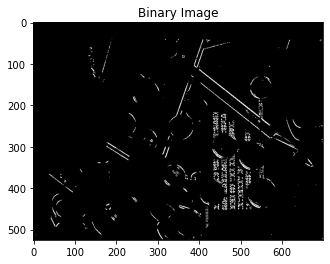

In [26]:
# Invoke the Hough Transform Method to Extract the Lines from the Image
# You need to find a resaonable estimate of the threshold for generating a binary image
# which is good enough for the Hough transform to extract the lines
# To expedite the process you can play with the resolution of the theta and rho 
# without compromising the quality of the results
theta_res = 1
rho_res =1
threshold = 160
clutter_smooth_accumulator, clutter_smooth_thetas, clutter_smooth_rhos, clutter_smooth_binary_img = hough_transform(clutter_smooth_img_gray_edge, threshold, theta_res, rho_res)

# Save the Thresholded Binary Image
cv.imwrite('../results/Ques_3/Clutter_Smooth_Binary_Image.png', clutter_smooth_binary_img)

#Plot the Binary Image
plt.figure(); plt.imshow(clutter_smooth_binary_img.astype(np.uint8), cmap='gray'); plt.title('Binary Image')

#### 3.4 Draw the detected lines

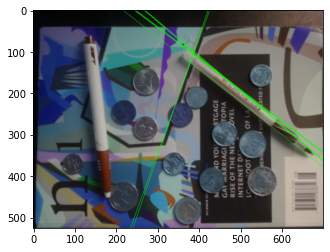

In [27]:
# Plot the Lines extracted on the Original Image
# Play with the Accumulator Thresholding to get rid of the unwanted lines
acc_threshold = 205
plot_lines('proj2-clutter-image-smoothed.png', clutter_smooth_accumulator, clutter_smooth_thetas, clutter_smooth_rhos, acc_threshold, save_path='Clutter_Smooth_Image_Output_Lines.png')

#### 3.5 Most likely the last exercise produced several lines which DO NOT repesent the boundaries of the pens. How do you take care of the probem? Discuss.

#### 3.6 Find the edges which represents only the boundaries of the pens and plot it on the smooth version of the clutter image. 
You need to write a function similar to plot_edges().

Save the output image as <b>'../results/Ques_3/Clutter_Smooth_Image_Output_Edges.png'</b>

### 4. Hough Transform to detect Circles from Cluttered Image (17 points)
In this exercise you are expected to implement Hough Transform for detecting circles from cluttered image. Hough Transform is applied on binary images which can be generated by thresholding the edge detector output.

#### Tasks:
1. Smooth the given image using the Gaussian Filter. Determine the Gaussian filter and comment on its effect in determining the circles. Save the smooth image as <b>clutter_smooth_img_circle_detection</b>, numpy array. <b>(2 points)</b>
2. Identify the edges in the smooth image, generated in the previous step. You can use the solution of <b>Ques 1.2</b>. Save the numpy array as <b>clutter_smooth_img_gray_edge_circle_detection</b>. <b>(2 points)</b>
3. Identify the circles in the Image using Hough Transform. <b>(2 points)</b>
4. Draw the detected circles. <b>(2 points)</b>
5. Did the last solution detect any unwanted circles? If yes, please explain the reason. Which parameters you feel are affecting the result. Moreover, what could be the correct measures to prevent this? <b>(5 points)</b>
6. You are required to find boundaries around atleast 8 coins in the image. <b>(4 points)</b>

#### 4.1 Smooth the given image using the Gaussian Filter. Determine the Gaussian filter and comment on its effect in determining the circles. Save the smooth image as <b>clutter_smooth_img_circle_detection</b>, numpy array.

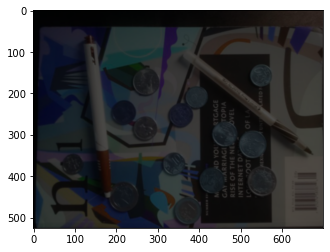

In [28]:
# Reading the Input Image
clutter_img_circle_detection        = cv.imread('../data/proj2-clutter-image.jpg')

##############################
# TO DO: Your Implementation
##############################
g_kernel   = Gaussian_Filter(sigma=2)

# Smoothing the image with the Gaussian Filter
clutter_smooth_img_circle_detection = cv.filter2D(clutter_img_circle_detection, -1, g_kernel)


################################
# Your Implementation ENDS here
################################

# Saves the Smooth Image in the result directory
cv.imwrite("proj2-clutter-image-smoothed_circle_detection.png", clutter_smooth_img_circle_detection)

# Plots the smoothed image in the notebook
plt.figure(); plt.imshow(clutter_smooth_img_circle_detection.astype(np.uint8));

#### 4.2 Identify the circles in the smooth image, generated in the previous step. You can use the solution of <b>Ques 1.2</b>. 
Save the numpy array as <b>clutter_smooth_img_gray_edge_circle_detection</b>.

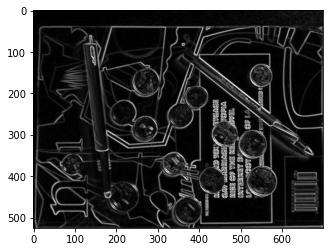

In [29]:
##############################
# TO DO: Your Implementation
##############################

clutter_smooth_img_circle_detection_gray = rgb2gray(clutter_smooth_img_circle_detection)
clutter_smooth_img_circle_detection_gray_unit = image_uint(clutter_smooth_img_circle_detection_gray)

#sobel
sobel_kernal_x = np.array([[1,2,1],[0,0,0],[-1,-2,-1]],dtype=int)
sobel_kernal_y = np.array([[1,0,-1],[2,0,-2],[1,0,-1]],dtype=int)
sobel_horizon = cv.filter2D(clutter_smooth_img_circle_detection_gray_unit, cv.CV_16S, sobel_kernal_x)
sobel_vertical = cv.filter2D(clutter_smooth_img_circle_detection_gray_unit, cv.CV_16S, sobel_kernal_y)
sobel_horizon_abs = cv.convertScaleAbs(sobel_horizon)
sobel_vertical_abs = cv.convertScaleAbs(sobel_vertical)
clutter_smooth_img_gray_edge_circle_detection = cv.addWeighted(sobel_horizon_abs, 0.5, sobel_vertical_abs, 0.5, 0)


################################
# Your Implementation ENDS here
################################

# Save the Image
cv.imwrite('Smooth_Clutter_Edge_Image_Circle_Detection.png', clutter_smooth_img_gray_edge_circle_detection)

#Plot the Image
plt.figure(); plt.imshow(clutter_smooth_img_gray_edge.astype(np.uint8), cmap='gray');

#### 4.3 Identify the circles in the Image using Hough Transform

True

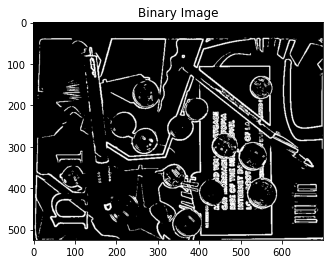

In [30]:
# Invoke the Hough Transform Method to Extract the Circles from the Image
# You need to find a resaonable estimate of the threshold for generating a binary image
# which is good enough for the Hough transform to extract circles
# To expedite the process you can play with the resolution parameters 
# without compromising the quality of the results
threshold=70
min_radius = 20
max_radius = 35
radius_res = 1
angle_res = 10
clutter_smooth_circle_accumulator, clutter_smooth_circle_radius_vector, clutter_smooth_circle_center_x_vector, clutter_smooth_circle_center_y_vector, clutter_smooth_circle_img_bin = circle_hough_transform(clutter_smooth_img_gray_edge_circle_detection, threshold, min_radius, max_radius, radius_res, angle_res)

# Save the Thresholded Binary Image
plt.figure(); plt.imshow(clutter_smooth_circle_img_bin.astype(np.uint8), cmap='gray'); plt.title('Binary Image')
cv.imwrite('Smooth_Clutter_Binary_Image_Circle_Detection.png', clutter_smooth_circle_img_bin)


#### 4.4 Draw the detected circles

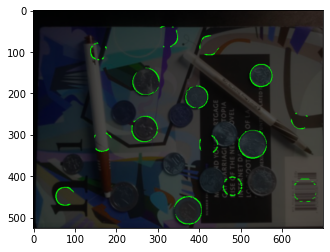

In [31]:
# Plot the Circles extracted on the Smooth Image
acc_threshold =100
plot_circles('proj2-clutter-image-smoothed_circle_detection.png', clutter_smooth_circle_accumulator, clutter_smooth_circle_radius_vector, clutter_smooth_circle_center_x_vector, clutter_smooth_circle_center_y_vector, acc_threshold, clutter_smooth_circle_img_bin, '../results/Ques_4/Smooth_Clutter_Image_Output_Circles.png')

#### 4.5 Did the last solution detect any unwanted circles? If yes, please explain the reason. Which parameters you feel are affecting the result. Moreover, what could be the correct measures to prevent this?

#### 4.6 Devise some mechanisms such that you can find boundaries of atleast 8 coins in the image

### 5 Test Robustness to Noise (15 points)
In this exercise, we test the robustness of Hough Transform to Gaussian noise.<br>
For this experiment, consider the optimum setting of the parameters (like sigma for smoothing, threshold for binary image, threshold for accumulator and others) for both line and circle detection using Hough Transform.<br>

Then keep adding Gaussian noise to the clutter image, <b>proj2-clutter-image.jpg</b>, starting with sigma value of 5.0 and doubling the sigma at every step, until the detection of lines and circles substantially fails. Mark this value as the of sigma as the failure sigma value.<br>

Between the starting sigma value i.e., 5.0 and the failure sigma value, show sequence of 5 images (equally spaced as per the number of steps) with the detected lines and circles drawn on them where each image represents different sigma value for the Gaussian noise.<br>

With failure sigma value as noise parameter, generate the noisy image and determine a smoothing filter (Gaussian filter as used earlier) to detect lines and circles from the noisy image. Do not change any other parameters used for extraction of lines and circles.

#### Task
1. Starting with sigma value of 5.0 and doubling the sigma at every step determine the sigma when the line and circle detection using Hough Transform fails. <b>(7 points)</b>
2. Plot sequence of 5 images (equally spaced as per the number of steps) with the detected lines or circles drawn on them where each image represents different sigma value for the Gaussian noise. Save the output images separately for circles and lines with the corresponding sigma values. <b>(5 points)</b>
3. Generate a smoothing filter that can handle the maximum noise and help in the detection of lines and circles from the noisy image. Keep the other parameters similar. Save the output images for circles and lines separately. <b>(3 points)</b>

#### Results:
All the output images should be saved in the directory <b>results/Ques_5/</b> with a meaningful name (as used in previous questions). Use the <b>imwrite</b> function in OpenCV library for saving images. You should use the OpenCV <b>line</b> and <b>circle</b> function to draw lines and circles respectively.

In [32]:
#(1)find beast sigma (proj2-clutter-image.jpg,line or circle)
sigma = 5
accumulator_max_num = 255
while accumulator_max_num>0 :
    img        = cv.imread('../data/proj2-clutter-image.jpg')
    g_kernel   = Gaussian_Filter(sigma)
    img_gaussian = cv.filter2D(img, -1, g_kernel)
    img_gaussian_gray = rgb2gray(img_gaussian)
    img_gaussian_gray_unit = image_uint(img_gaussian_gray)

    #sobel
    sobel_kernal_x = np.array([[1,2,1],[0,0,0],[-1,-2,-1]],dtype=int)
    sobel_kernal_y = np.array([[1,0,-1],[2,0,-2],[1,0,-1]],dtype=int)
    sobel_horizon = cv.filter2D(img_gaussian_gray_unit, cv.CV_16S, sobel_kernal_x)
    sobel_vertical = cv.filter2D(img_gaussian_gray_unit, cv.CV_16S, sobel_kernal_y)
    sobel_horizon_abs = cv.convertScaleAbs(sobel_horizon)
    sobel_vertical_abs = cv.convertScaleAbs(sobel_vertical)
    img_gaussian_gray_edge = cv.addWeighted(sobel_horizon_abs, 0.5, sobel_vertical_abs, 0.5, 0)
    
    #hough
    accumulator, thetas, rhos, binary_img = hough_transform(img_gaussian_gray_edge, 140, 1, 1)
    accumulator_max_num=np.max(accumulator)
    print("Process----",sigma)
    sigma+=1
    
print("sigma max is ",sigma)
#plt.figure(); plt.imshow(img_gaussian.astype(np.uint8));
#plt.figure(); plt.imshow(img_gaussian_gray_unit.astype(np.uint8), cmap='gray'); plt.title('Binary Image')


Process---- 5
Process---- 6
Process---- 7
Process---- 8
Process---- 9
Process---- 10
Process---- 11
Process---- 12
Process---- 13
Process---- 14
Process---- 15
Process---- 16
Process---- 17
Process---- 18
Process---- 19
Process---- 20
Process---- 21
Process---- 22
Process---- 23
Process---- 24
Process---- 25
Process---- 26
Process---- 27
Process---- 28
sigma max is  29


D:\ProgramData\Anaconda3\envs\proj2\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


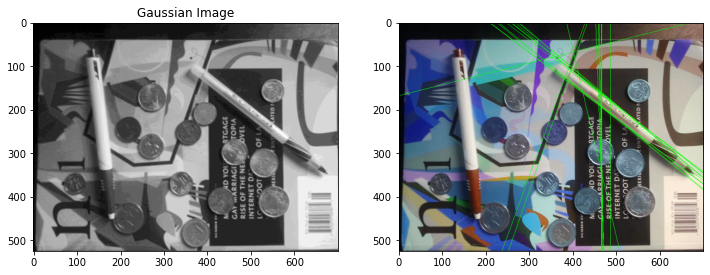

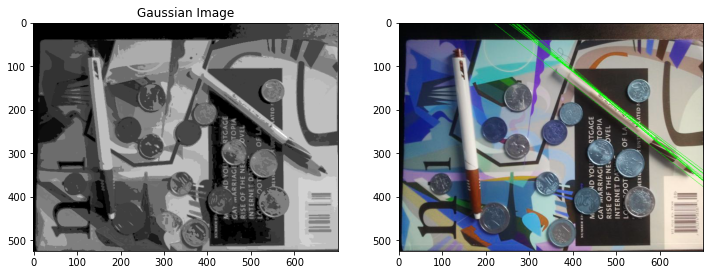

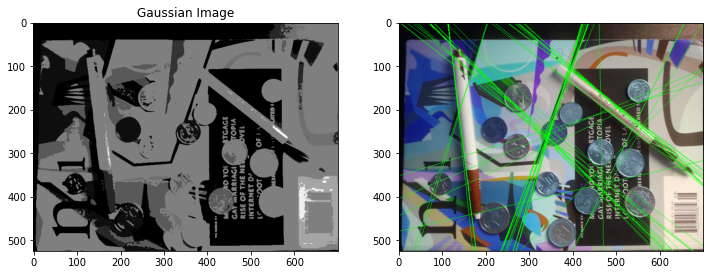

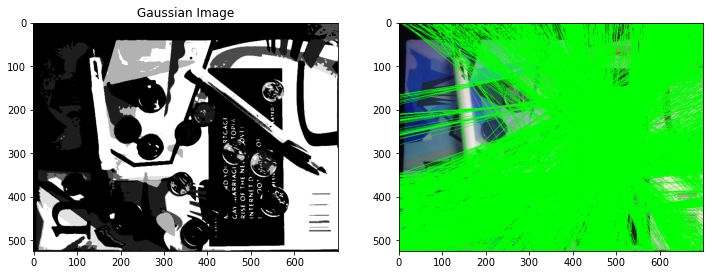

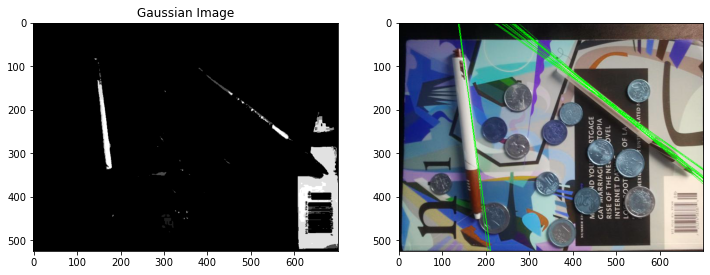

In [42]:
#5-2 find line
sigma_array = [5,10,15,20,25]
for i in sigma_array:
    img        = cv.imread('../data/proj2-clutter-image.jpg')
    g_kernel   = Gaussian_Filter(i)
    img_gaussian = cv.filter2D(img, -1, g_kernel)
    img_gaussian_gray = rgb2gray(img_gaussian)
    img_gaussian_gray_unit = image_uint(img_gaussian_gray)

    #sobel
    sobel_kernal_x = np.array([[1,2,1],[0,0,0],[-1,-2,-1]],dtype=int)
    sobel_kernal_y = np.array([[1,0,-1],[2,0,-2],[1,0,-1]],dtype=int)
    sobel_horizon = cv.filter2D(img_gaussian_gray_unit, cv.CV_16S, sobel_kernal_x)
    sobel_vertical = cv.filter2D(img_gaussian_gray_unit, cv.CV_16S, sobel_kernal_y)
    sobel_horizon_abs = cv.convertScaleAbs(sobel_horizon)
    sobel_vertical_abs = cv.convertScaleAbs(sobel_vertical)
    img_gaussian_gray_edge = cv.addWeighted(sobel_horizon_abs, 0.5, sobel_vertical_abs, 0.5, 0)
    
    #hough
    accumulator, thetas, rhos, binary_img = hough_transform(img_gaussian_gray_edge, 140, 1, 1)
    
    #plot line
    acc_threshold = 205
    plt.figure(figsize=(12,12));
    plt.subplot(1,2,1),plt.imshow(img_gaussian_gray_unit.astype(np.uint8), cmap='gray'); plt.title('Gaussian Image')
    plt.subplot(1,2,2),plot_lines('../data/proj2-clutter-image.jpg', accumulator, thetas, rhos, acc_threshold, save_path='proj2-clutter-'+str(i)+'-image_Output_Lines.png')



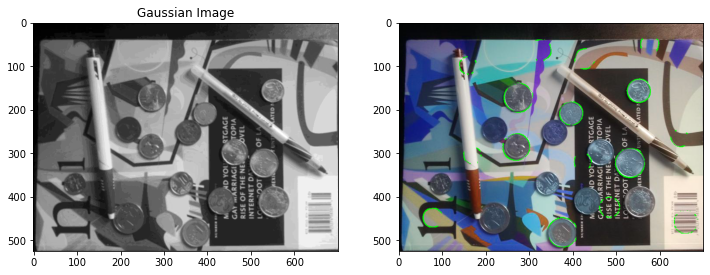

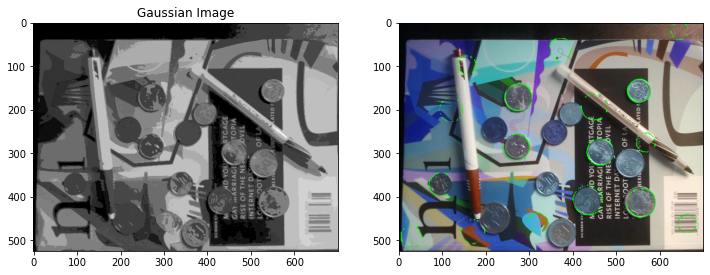

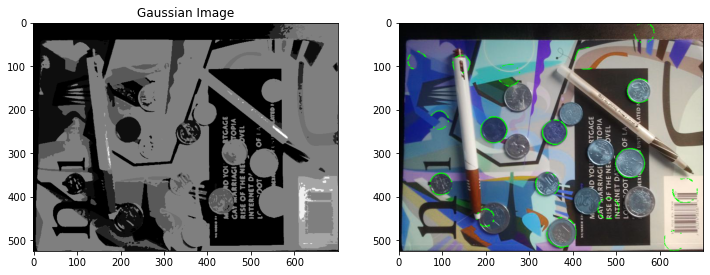

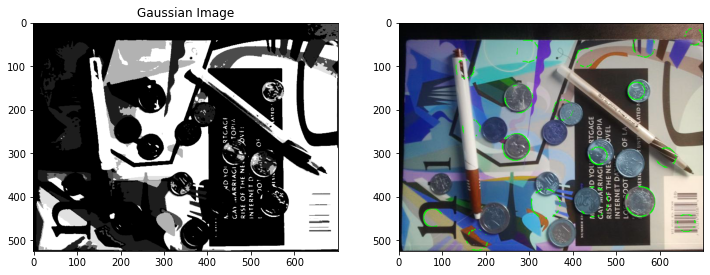

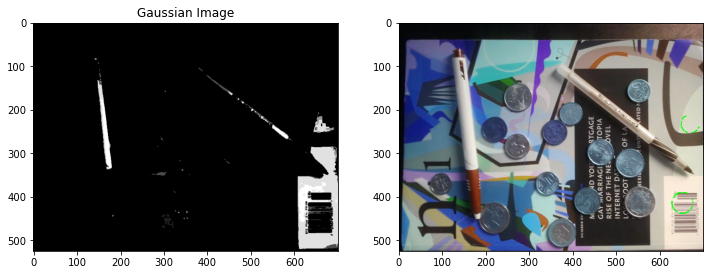

In [51]:
#5-2 find circle
sigma_array = [5,10,15,20,25]
for i in sigma_array:
    img        = cv.imread('../data/proj2-clutter-image.jpg')
    g_kernel   = Gaussian_Filter(i)
    img_gaussian = cv.filter2D(img, -1, g_kernel)
    img_gaussian_gray = rgb2gray(img_gaussian)
    img_gaussian_gray_unit = image_uint(img_gaussian_gray)

    #sobel
    sobel_kernal_x = np.array([[1,2,1],[0,0,0],[-1,-2,-1]],dtype=int)
    sobel_kernal_y = np.array([[1,0,-1],[2,0,-2],[1,0,-1]],dtype=int)
    sobel_horizon = cv.filter2D(img_gaussian_gray_unit, cv.CV_16S, sobel_kernal_x)
    sobel_vertical = cv.filter2D(img_gaussian_gray_unit, cv.CV_16S, sobel_kernal_y)
    sobel_horizon_abs = cv.convertScaleAbs(sobel_horizon)
    sobel_vertical_abs = cv.convertScaleAbs(sobel_vertical)
    img_gaussian_gray_edge = cv.addWeighted(sobel_horizon_abs, 0.5, sobel_vertical_abs, 0.5, 0)
    
    #hough
    accumulator, radius_vector, center_x_vector, center_y_vector, img_bin = circle_hough_transform(img_gaussian_gray_edge, 70, 20, 35, 1, 10)

    #plot line
    acc_threshold = 100
    plt.figure(figsize=(12,12));
    plt.subplot(1,2,1),plt.imshow(img_gaussian_gray_unit.astype(np.uint8), cmap='gray'); plt.title('Gaussian Image')
    plt.subplot(1,2,2),plot_circles('../data/proj2-clutter-image.jpg', accumulator, radius_vector, center_x_vector, center_y_vector, acc_threshold, img_bin, 'proj2-clutter-'+str(i)+'-image_Output_Cricle.png')


(<AxesSubplot:>, None)

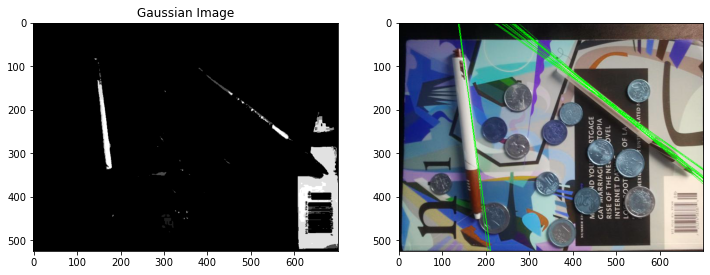

In [53]:
#5-3 find best line
img        = cv.imread('../data/proj2-clutter-image.jpg')
g_kernel   = Gaussian_Filter(25)
img_gaussian = cv.filter2D(img, -1, g_kernel)
img_gaussian_gray = rgb2gray(img_gaussian)
img_gaussian_gray_unit = image_uint(img_gaussian_gray)

#sobel
sobel_kernal_x = np.array([[1,2,1],[0,0,0],[-1,-2,-1]],dtype=int)
sobel_kernal_y = np.array([[1,0,-1],[2,0,-2],[1,0,-1]],dtype=int)
sobel_horizon = cv.filter2D(img_gaussian_gray_unit, cv.CV_16S, sobel_kernal_x)
sobel_vertical = cv.filter2D(img_gaussian_gray_unit, cv.CV_16S, sobel_kernal_y)
sobel_horizon_abs = cv.convertScaleAbs(sobel_horizon)
sobel_vertical_abs = cv.convertScaleAbs(sobel_vertical)
img_gaussian_gray_edge = cv.addWeighted(sobel_horizon_abs, 0.5, sobel_vertical_abs, 0.5, 0)
    
#hough
accumulator, thetas, rhos, binary_img = hough_transform(img_gaussian_gray_edge, 140, 1, 1)

#plot line
acc_threshold = 205
plt.figure(figsize=(12,12));
plt.subplot(1,2,1),plt.imshow(img_gaussian_gray_unit.astype(np.uint8), cmap='gray'); plt.title('Gaussian Image')
plt.subplot(1,2,2),plot_lines('../data/proj2-clutter-image.jpg', accumulator, thetas, rhos, acc_threshold, save_path='proj2-clutter-best-image_Output_Lines.png')



(<AxesSubplot:>, None)

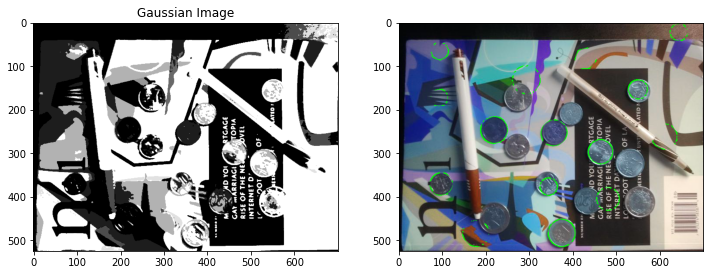

In [52]:
#5-3 find best circle
img        = cv.imread('../data/proj2-clutter-image.jpg')
g_kernel   = Gaussian_Filter(17)
img_gaussian = cv.filter2D(img, -1, g_kernel)
img_gaussian_gray = rgb2gray(img_gaussian)
img_gaussian_gray_unit = image_uint(img_gaussian_gray)

#sobel
sobel_kernal_x = np.array([[1,2,1],[0,0,0],[-1,-2,-1]],dtype=int)
sobel_kernal_y = np.array([[1,0,-1],[2,0,-2],[1,0,-1]],dtype=int)
sobel_horizon = cv.filter2D(img_gaussian_gray_unit, cv.CV_16S, sobel_kernal_x)
sobel_vertical = cv.filter2D(img_gaussian_gray_unit, cv.CV_16S, sobel_kernal_y)
sobel_horizon_abs = cv.convertScaleAbs(sobel_horizon)
sobel_vertical_abs = cv.convertScaleAbs(sobel_vertical)
img_gaussian_gray_edge = cv.addWeighted(sobel_horizon_abs, 0.5, sobel_vertical_abs, 0.5, 0)
    
#hough
accumulator, radius_vector, center_x_vector, center_y_vector, img_bin = circle_hough_transform(img_gaussian_gray_edge, 70, 20, 35, 1, 10)

#plot line
acc_threshold = 100
plt.figure(figsize=(12,12));
plt.subplot(1,2,1),plt.imshow(img_gaussian_gray_unit.astype(np.uint8), cmap='gray'); plt.title('Gaussian Image')
plt.subplot(1,2,2),plot_circles('../data/proj2-clutter-image.jpg', accumulator, radius_vector, center_x_vector, center_y_vector, acc_threshold, img_bin, 'proj2-clutter-best-image_Output_Cricle.png')



### 6 Hough Transform to detect Lines and Circles from a Distorted Image (15 points)
In this exercise you are expected to implement Hough Transform for detecting lines and circles from distorted image, <b>proj2-foreshortened-image.jpg</b>. Load the image from the data directory to do all the procesing to extract the lines and circles.


#### Tasks:
1. Do whatever is essential to extract the lines and circles from the given image. <b>(5 points)</b>
2. Plot the edges of the pens and boundaries of the coins, if you could extract the lines and circles, using the functions defined in the previous questions <b>(2 points)</b>
3. Elaborately describe the details of the experiments that you conducted and justify your approaches. <b>(4 points)</b>
4. If you fail in extracting lines and circles from the distorted image, explain why? Propose plausible solutions to fix the problems. <b>(4 points)</b>

#### Results:
All the output images should be saved in the directory <b>results/Ques_6/</b> with a meaningful name (as used in previous questions). Use the <b>imwrite</b> function in OpenCV library for saving images. You should use the OpenCV <b>line</b> and <b>circle</b> function to draw lines and circles respectively.

(<AxesSubplot:>, None)

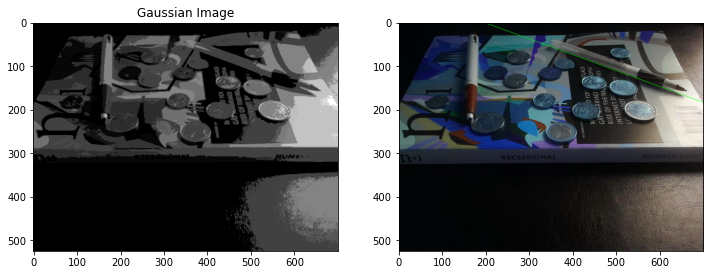

In [70]:
#6-1 find line
img        = cv.imread('../data/proj2-foreshortened-image.jpg')
g_kernel   = Gaussian_Filter(10)
img_gaussian = cv.filter2D(img, -1, g_kernel)
img_gaussian_gray = rgb2gray(img_gaussian)
img_gaussian_gray_unit = image_uint(img_gaussian_gray)

#sobel
sobel_kernal_x = np.array([[1,2,1],[0,0,0],[-1,-2,-1]],dtype=int)
sobel_kernal_y = np.array([[1,0,-1],[2,0,-2],[1,0,-1]],dtype=int)
sobel_horizon = cv.filter2D(img_gaussian_gray_unit, cv.CV_16S, sobel_kernal_x)
sobel_vertical = cv.filter2D(img_gaussian_gray_unit, cv.CV_16S, sobel_kernal_y)
sobel_horizon_abs = cv.convertScaleAbs(sobel_horizon)
sobel_vertical_abs = cv.convertScaleAbs(sobel_vertical)
img_gaussian_gray_edge = cv.addWeighted(sobel_horizon_abs, 0.5, sobel_vertical_abs, 0.5, 0)
    
#hough
accumulator, thetas, rhos, binary_img = hough_transform(img_gaussian_gray_edge, 140, 1, 1)

#plot line
acc_threshold = 205
plt.figure(figsize=(12,12));
plt.subplot(1,2,1),plt.imshow(img_gaussian_gray_unit.astype(np.uint8), cmap='gray'); plt.title('Gaussian Image')
plt.subplot(1,2,2),plot_lines('../data/proj2-foreshortened-image.jpg', accumulator, thetas, rhos, acc_threshold, save_path='proj2-foreshortened-best-image_Output_Lines.png')


(<AxesSubplot:>, None)

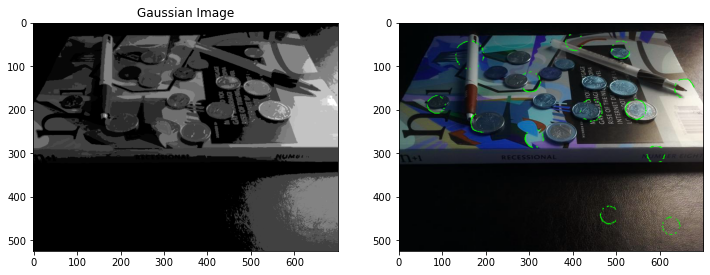

In [71]:
#6-1 find circle
img        = cv.imread('../data/proj2-foreshortened-image.jpg')
g_kernel   = Gaussian_Filter(10)
img_gaussian = cv.filter2D(img, -1, g_kernel)
img_gaussian_gray = rgb2gray(img_gaussian)
img_gaussian_gray_unit = image_uint(img_gaussian_gray)

#sobel
sobel_kernal_x = np.array([[1,2,1],[0,0,0],[-1,-2,-1]],dtype=int)
sobel_kernal_y = np.array([[1,0,-1],[2,0,-2],[1,0,-1]],dtype=int)
sobel_horizon = cv.filter2D(img_gaussian_gray_unit, cv.CV_16S, sobel_kernal_x)
sobel_vertical = cv.filter2D(img_gaussian_gray_unit, cv.CV_16S, sobel_kernal_y)
sobel_horizon_abs = cv.convertScaleAbs(sobel_horizon)
sobel_vertical_abs = cv.convertScaleAbs(sobel_vertical)
img_gaussian_gray_edge = cv.addWeighted(sobel_horizon_abs, 0.5, sobel_vertical_abs, 0.5, 0)
    
#hough
accumulator, radius_vector, center_x_vector, center_y_vector, img_bin = circle_hough_transform(img_gaussian_gray_edge, 70, 20, 35, 1, 10)

#plot line
acc_threshold = 100
plt.figure(figsize=(12,12));
plt.subplot(1,2,1),plt.imshow(img_gaussian_gray_unit.astype(np.uint8), cmap='gray'); plt.title('Gaussian Image')
plt.subplot(1,2,2),plot_circles('../data/proj2-foreshortened-image.jpg', accumulator, radius_vector, center_x_vector, center_y_vector, acc_threshold, img_bin, 'proj2-foreshortened-best-image_Output_Cricle.png')

